In [1]:
import random
import math
from alive_progress import alive_bar #progress bar for loops
import matplotlib.pyplot as plt
import numpy as np
import time

### PART 0: IMPLEMENTATION OF SORTING ALGORITHMS

In [34]:
#Insertion Sort
def insertionsort(lst): 
    arr = lst[:]
    comparisons = 0     
    for i in range(1, len(arr)): 
        key = arr[i] 
        j = i - 1 
        while j >= 0: 
            comparisons += 1 
            if arr[j] > key: 
                arr[j + 1] = arr[j] 
                j -= 1 
            else: 
                break 
            arr[j + 1] = key 
    return (arr, comparisons)

#Merge Sort
#will be used in hybrid algorithm
def merge(l1, l2):
    #print(l1, l2)
    ans = []
    p1 = 0
    p2 = 0
    comparisons = 0
    while p1<len(l1) and p2<len(l2):
        comparisons += 1
        if l1[p1] < l2[p2]:
            ans.append(l1[p1])
            p1+=1
        else:
            ans.append(l2[p2])
            p2+=1
    ans.extend(l1[p1:])
    ans.extend(l2[p2:])
    return (ans, comparisons)

def mergesort(lst):
    if len(lst)<=1:
        return lst[:], 0
    mid = len(lst)//2
    left, left_comps = mergesort(lst[:mid])
    right, right_comps = mergesort(lst[mid:])
    merged, merge_comps = merge(left, right)
    return merged, left_comps + right_comps + merge_comps

### PART A: HYBRID SORT

In [35]:
#function that integrates the insertion sort and the merge sort logics
def integrate(lst, S=15):
    def hybrid(arr):
        n = len(arr)
        if n <= 1:
            return (list(arr), 0)
        if n <= S:
            return insertionsort(arr)
        mid = n // 2
        left_sorted, left_comp = hybrid(arr[:mid])
        right_sorted, right_comp = hybrid(arr[mid:])
        merged, merge_comp = merge(left_sorted, right_sorted)
        return (merged, left_comp + right_comp + merge_comp)

    return hybrid(lst)

### PART B: GENERATION OF DATASETS

In [33]:
#function to generate datasets (for different sizes)
def generate_datasets(sizes,x): #x is the max value of the random integers
    datasets={}
    for n in sizes:
        datasets[n]=[random.randint(0,x) for _ in range(n)]
    return datasets
sizes=[1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]
random.seed(2025) # for reproducibility
datasets=generate_datasets(sizes,1000000000) #dictionary of datasets with key as size

#function to generate multiple datasets (for same size)
def generate_datasets_n(size,number_of_datasets,x): 
    datasets={}
    for n in range(number_of_datasets):
        datasets[n]=[random.randint(0,x) for _ in range(size)]
    return datasets #dictionary of datasets with same size

# for reproducibility
np.random.seed(2025)

### PART C: TESTING THE SORTS AND PLOTTING GRAPHS

#### Analysis of Time Complexity

When recursion stops at size $S$, number of subarrays $\approx \frac{n}{s}$. <br>
In the worst case, insertion sort does $1+2+3+...+(n-1)$ comparisons.<br> Therefore considering randomly ordered subarray, on average, comparisons stop halfway through the list (element is somewhere in the middle). <br>The expected number of comparisons done by insertion sort on subarray of size $S$ is $\frac{1}{2}(1+2+3...+(S-1))=\frac{1}{2} \cdot \frac{S(S-1)}{2} = \frac{S(S-1)}{4}$.<br>
The number of comparisons done by insertion sort on all subarrays is $$\frac{n}{S} \cdot \frac{S(S-1)}{4} = \frac{n(S-1)}{4}$$ <br>
Combining with mergesort, $$T_{hybrid}(n, S) = n\ \log_2\ \frac{n}{S} + \frac{n(S-1)}{4}$$

In [105]:
def theoretical_comparisons(n, S): #approx number of comparisons for hybrid
    if S >= n:
        # if S >= n, it's just insertion sort on the whole array
        return  (n * (n-1) / 4)
    return n * math.log2(n / S) + (n * (S-1) / 4)

#### Running hybrid sort on generated datasets in part B

In [5]:
for i in datasets:
    _, comps = integrate(datasets[i], 15) #set S=15
    print(f"Size: {i}, Comparisons: {comps}")

for j in datasets:
    # print(j)
    assert integrate(datasets[j], 15)[0] == sorted(datasets[j]) #checking if hybrid sort works correctly

Size: 1000, Comparisons: 9541
Size: 5000, Comparisons: 58279
Size: 10000, Comparisons: 127129
Size: 50000, Comparisons: 768895
Size: 100000, Comparisons: 1639691
Size: 500000, Comparisons: 9443316
Size: 1000000, Comparisons: 19889843
Size: 5000000, Comparisons: 108211729
Size: 10000000, Comparisons: 226416463


#### Part C.1

With the value of S fixed, plot the number of key comparisons over
different sizes of the input list n. Compare your empirical results with
your theoretical analysis of the time complexity.

In [ ]:
S_fixed = 20
n_values = [1000,5000,10000,50000,100000,500000,1000000,5000000,10000000]
comps_n_dict = {}
trials = 5

with alive_bar(len(n_values), title="Comparison counting for fixed S...", force_tty=True) as bar:
    for n in n_values:
        avg_comps = 0
        for _ in range(trials):
            random.seed(2025)
            dataset = [random.randint(0, 10**9) for _ in range(n)]
            _, comps = integrate(dataset, S_fixed)
            avg_comps += comps
        comps_n_dict[n] = avg_comps / trials
        bar()

theoretical_results_n = {n: theoretical_comparisons(n, S_fixed) for n in n_values}

Comparison counting for fixed S... |████████████████████████████████████████| 9/


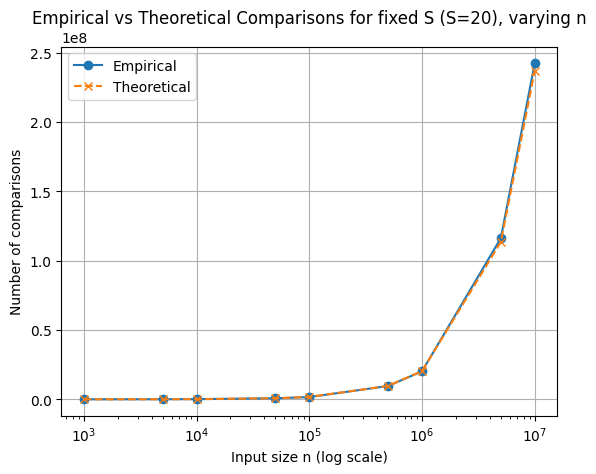

In [83]:
# plotting empirical vs theoretical results
plt.plot(list(comps_n_dict.keys()), list(comps_n_dict.values()), label="Empirical", marker="o")
plt.plot(list(theoretical_results_n.keys()), list(theoretical_results_n.values()),
         label="Theoretical", linestyle="--", marker="x")

plt.xlabel("Input size n (log scale)")
plt.ylabel("Number of comparisons")
plt.xscale("log")
plt.title(f"Empirical vs Theoretical Comparisons for fixed S (S={S_fixed}), varying n")
plt.legend()
plt.grid(True)
plt.show()

#### Part C.2 

With the input size n fixed, plot the number of key comparisons over
different values of S. Compare your empirical results with your
theoretical analysis of the time complexity.

In [ ]:
# Testing on input size n
n = 10000
number_of_datasets = 100
x = 100000000
# generate 100 datasets of size n
datasets_c_2 = generate_datasets_n(n, number_of_datasets, x)
print(f"Generated {len(datasets_c_2)} datasets of size {n} for testing.") # can be reused for testing
s = [x for x in range(1,101)] # S values from 1 to 100
comps_hyb_dict = {} # each S value (key) is mapped to average comparisons (value)

with alive_bar(len(s), title="Comparison counting in progress...", force_tty=True) as bar:
    for i in s:
        avg_comps = 0 #average comparisons for each S value
        for j in datasets_c_2:
            avg_comps += integrate(datasets_c_2[j], i)[1] #adding up comparisons for each S value
        comps_hyb_dict[i] = avg_comps/len(datasets_c_2) #average comparisons for each S value
        bar()

Generated 100 datasets of size 10000 for testing.
Comparison counting in progress... |████████████████████████████████████████| 10


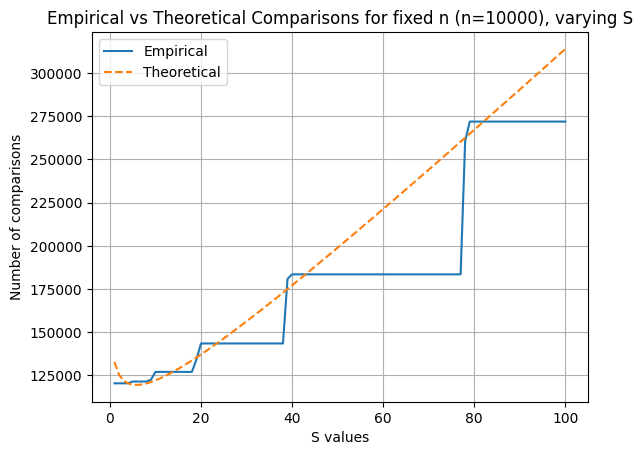

In [86]:
# Plotting average comparisons against varying S values
# n and s were definied earlier, n = 10000, s = [x for x in range(1,101)]
theoretical_results_s = {S: theoretical_comparisons(n, S) for S in s}

# plotting empirical vs theoretical results
plt.plot(list(comps_hyb_dict.keys()), list(comps_hyb_dict.values()), label="Empirical")
plt.plot(list(theoretical_results_s.keys()), list(theoretical_results_s.values()), label="Theoretical", linestyle="--")

plt.xlabel("S values")
plt.ylabel("Number of comparisons")
plt.title(f"Empirical vs Theoretical Comparisons for fixed n (n={n}), varying S")
plt.legend()
plt.grid(True)
plt.show()

In [75]:
for j in datasets_c_2:
    # print(j)
    assert integrate(datasets_c_2[j], 15)[0] == sorted(datasets_c_2[j]) #checking if hybrid sort works correctly

### PART C.3
Using different sizes of input datasets, study how to determine an optimal value of S 
for the best performance of this hybrid algorithm (minimizing execution time).

finding optimal S values for different input sizes (minimizing execution time)...

testing input size n = 1000
  optimal S = 19, min time = 0.0008s

testing input size n = 2000
  optimal S = 22, min time = 0.0020s

testing input size n = 3000
  optimal S = 13, min time = 0.0032s

testing input size n = 4000
  optimal S = 72, min time = 0.0070s

testing input size n = 5000
  optimal S = 19, min time = 0.0061s

testing input size n = 6000
  optimal S = 20, min time = 0.0076s

testing input size n = 7000
  optimal S = 24, min time = 0.0089s

testing input size n = 8000
  optimal S = 24, min time = 0.0109s

testing input size n = 9000
  optimal S = 24, min time = 0.0132s

testing input size n = 10000
  optimal S = 14, min time = 0.0144s


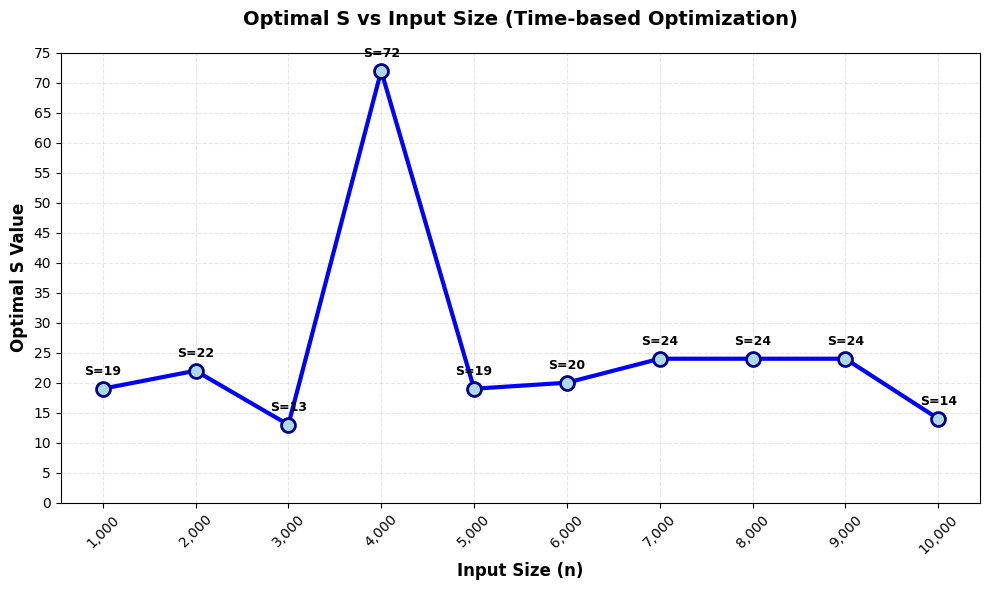


ANALYSIS OF OPTIMAL S VALUES (Time-based)
n =     1000: optimal S = 19, min time = 0.0008s
n =     2000: optimal S = 22, min time = 0.0020s
n =     3000: optimal S = 13, min time = 0.0032s
n =     4000: optimal S = 72, min time = 0.0070s
n =     5000: optimal S = 19, min time = 0.0061s
n =     6000: optimal S = 20, min time = 0.0076s
n =     7000: optimal S = 24, min time = 0.0089s
n =     8000: optimal S = 24, min time = 0.0109s
n =     9000: optimal S = 24, min time = 0.0132s
n =    10000: optimal S = 14, min time = 0.0144s

RECOMMENDATION
optimal S values for each n: [19, 22, 13, 72, 19, 20, 24, 24, 24, 14]
recommended overall S: 22
total execution time for S=22: 0.0866s

execution time table:
S    1000   2000   3000   4000   5000   sum
13   0.001   0.002   0.003   0.017   0.008  0.091
14   0.001   0.003   0.003   0.014   0.008  0.089
19   0.001   0.003   0.003   0.015   0.006  0.091
20   0.001   0.002   0.004   0.018   0.007  0.093
22   0.001   0.002   0.003   0.012   0.007  0.087

In [42]:
#PART C.3:



import time

# different input sizes to test
n_values_c3 = [x for x in range(1000,10001,1000)]
# S values to test for each input size
S_values_c3 = list(range(1, 101))  # testing S from 1 to 100
trials_c3 = 100  # number of trials per (n, S) combination

# set seed for reproducibility
random.seed(2025)

# generate fixed datasets for each input size
fixed_datasets = {}
for n in n_values_c3:
    datasets = []
    for trial in range(trials_c3):
        dataset = [random.randint(0, 10**9) for _ in range(n)]
        datasets.append(dataset)
    fixed_datasets[n] = datasets
    

# dictionary to store optimal S for each input size
optimal_S_results = {}

print("finding optimal S values for different input sizes (minimizing execution time)...")


for n in n_values_c3:
    print(f"\ntesting input size n = {n}")
    
    # dictionary to store average execution times for each S value
    avg_times_by_S = {}
    
    # test each S value
    for S in S_values_c3:
        total_time = 0
        
        # run multiple trials for this (n, S) combination
        for trial in range(trials_c3):
            #dataset = [random.randint(0, 10**9) for _ in range(n)]
            dataset = fixed_datasets[n][trial]  # use fixed dataset
            
            # measure execution time
            start_time = time.time()
            integrate(dataset, S)
            end_time = time.time()
            
            total_time += (end_time - start_time)
        
        avg_times_by_S[S] = total_time / trials_c3
    
    # find the S value that gives minimum average execution time
    optimal_S = min(avg_times_by_S, key=avg_times_by_S.get)
    min_time = avg_times_by_S[optimal_S]
    
    optimal_S_results[n] = {
        'optimal_S': optimal_S,
        'min_time': min_time,
        'all_times': avg_times_by_S
    }
    
    print(f"  optimal S = {optimal_S}, min time = {min_time:.4f}s")
        

# plot: optimal S vs input size
plt.figure(figsize=(10, 6))

n_list = list(optimal_S_results.keys())
optimal_S_list = [optimal_S_results[n]['optimal_S'] for n in n_list]

plt.plot(n_list, optimal_S_list, 'bo-', linewidth=3, markersize=10, markerfacecolor='lightblue', 
         markeredgecolor='darkblue', markeredgewidth=2)

plt.xlabel("Input Size (n)", fontsize=12, fontweight='bold')
plt.ylabel("Optimal S Value", fontsize=12, fontweight='bold')
plt.title("Optimal S vs Input Size (Time-based Optimization)", fontsize=14, fontweight='bold', pad=20)

# customize x-axis ticks
plt.xticks(n_list, [f'{n:,}' for n in n_list], rotation=45, fontsize=10)
#plt.xscale('log')

# customize y-axis ticks
plt.yticks(range(0, max(optimal_S_list) + 5, 5), fontsize=10)

# add grid
plt.grid(True, alpha=0.3, linestyle='--')

# add value labels on points
for i, (n, s) in enumerate(zip(n_list, optimal_S_list)):
    plt.annotate(f'S={s}', (n, s), textcoords="offset points", xytext=(0,10), 
                ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# analysis of optimal S values
print("\n" + "="*60)
print("ANALYSIS OF OPTIMAL S VALUES (Time-based)")
print("="*60)

for n in n_list:
    optimal_S = optimal_S_results[n]['optimal_S']
    min_time = optimal_S_results[n]['min_time']
    print(f"n = {n:>8}: optimal S = {optimal_S:>2}, min time = {min_time:.4f}s")

# overall optimal S recommendation
print(f"\n" + "="*40)
print("RECOMMENDATION")
print("="*40)

# find S value with minimum total execution time across all input sizes
total_times_by_S = {}
for S in S_values_c3:
    total_time = 0
    for n in n_list:
        if S in optimal_S_results[n]['all_times']:
            total_time += optimal_S_results[n]['all_times'][S]
    total_times_by_S[S] = total_time

# find the S with minimum total time
best_S = min(total_times_by_S, key=total_times_by_S.get)
best_total_time = total_times_by_S[best_S]

print(f"optimal S values for each n: {[optimal_S_results[n]['optimal_S'] for n in n_list]}")
print(f"recommended overall S: {best_S}")
print(f"total execution time for S={best_S}: {best_total_time:.4f}s")

# execution time table
print(f"\nexecution time table:")
print(f"S    {n_list[0]}   {n_list[1]}   {n_list[2]}   {n_list[3]}   {n_list[4]}   sum")

# get unique optimal S values
optimal_S_values = list(set([optimal_S_results[n]['optimal_S'] for n in n_list]))
optimal_S_values.sort()

for S in optimal_S_values:
    total_time = 0
    times = []
    
    for n in n_list:
        if S in optimal_S_results[n]['all_times']:
            time_val = optimal_S_results[n]['all_times'][S]
            times.append(f"{time_val:.3f}")
            total_time += time_val
        else:
            times.append("N/A")
    
    print(f"{S:2}  {times[0]:>6}  {times[1]:>6}  {times[2]:>6}  {times[3]:>6}  {times[4]:>6}  {total_time:.3f}")

# add recommended S if it's not already in the table
if best_S not in optimal_S_values:
    total_time = 0
    times = []
    
    for n in n_list:
        if best_S in optimal_S_results[n]['all_times']:
            time_val = optimal_S_results[n]['all_times'][best_S]
            times.append(f"{time_val:.3f}")
            total_time += time_val
        else:
            times.append("N/A")
    
    print(f"{best_S:2}* {times[0]:>6}  {times[1]:>6}  {times[2]:>6}  {times[3]:>6}  {times[4]:>6}  {total_time:.3f}")


### PART D:
Implement the original Mergesort algorithm. Compare its performance against the hybrid 
algorithm (in terms of key comparisons and CPU times) using a dataset of 10 million integers. 
The optimal S value determined in part (c) should be used for this comparison.


In [43]:
# test dataset size
test_size = 10000000  # 10 million integers
print(f"testing with dataset of {test_size:,} integers...")

# generate test dataset
random.seed(2025)
test_dataset = [random.randint(10000000, 20000000) for _ in range(test_size)]
print(f"generated test dataset of size {len(test_dataset):,}")

# test original mergesort
print(f"\ntesting original mergesort...")
start_time = time.time()
sorted_merge, merge_comps = mergesort(test_dataset)
merge_time = time.time() - start_time

# test hybrid sort with optimal S
print(f"testing hybrid sort with optimal S = {best_S}...")
start_time = time.time()
sorted_hybrid, hybrid_comps = integrate(test_dataset, best_S)
hybrid_time = time.time() - start_time

# verify both produce same result
print(f"verifying both algorithms produce same sorted result...")
is_same = sorted_merge == sorted_hybrid
print(f"results match: {is_same}")

# display comparison results
print(f"\n" + "="*60)
print("PERFORMANCE COMPARISON")
print("="*60)
print(f"{'Algorithm':<15} {'Comparisons':<15} {'Time (s)':<12} {'Speedup':<10}")
print("-" * 60)
print(f"{'Original Merge':<15} {merge_comps:<15,} {merge_time:<12.4f} {'1.00x':<10}")
print(f"{'Hybrid (S=' + str(best_S) + ')':<15} {hybrid_comps:<15,} {hybrid_time:<12.4f} {merge_time/hybrid_time:<10.2f}x")

# calculate differences
comp_difference = ((merge_comps - hybrid_comps) / merge_comps) * 100
time_difference = ((merge_time - hybrid_time) / merge_time) * 100

print(f"\n" + "="*60)
print("DIFFERENCE ANALYSIS")
print("="*60)
print(f"comparison reduction: {comp_difference:.2f}% ({merge_comps:,} → {hybrid_comps:,})")
print(f"time reduction: {time_difference:.2f}% ({merge_time:.4f}s → {hybrid_time:.4f}s)")
print(f"speedup factor: {merge_time/hybrid_time:.2f}x faster")

if hybrid_time < merge_time:
    print(f"\nhybrid sort is {merge_time/hybrid_time:.2f}x faster than original mergesort!")
else:
    print(f"\n hybrid sort is {merge_time/hybrid_time:.2f}x slower than original mergesort")

testing with dataset of 10,000,000 integers...
generated test dataset of size 10,000,000

testing original mergesort...
testing hybrid sort with optimal S = 22...
verifying both algorithms produce same sorted result...
results match: True

PERFORMANCE COMPARISON
Algorithm       Comparisons     Time (s)     Speedup   
------------------------------------------------------------
Original Merge  220,097,005     90.3206      1.00x     
Hybrid (S=22)   242,323,730     106.3529     0.85      x

DIFFERENCE ANALYSIS
comparison reduction: -10.10% (220,097,005 → 242,323,730)
time reduction: -17.75% (90.3206s → 106.3529s)
speedup factor: 0.85x faster

 hybrid sort is 0.85x slower than original mergesort


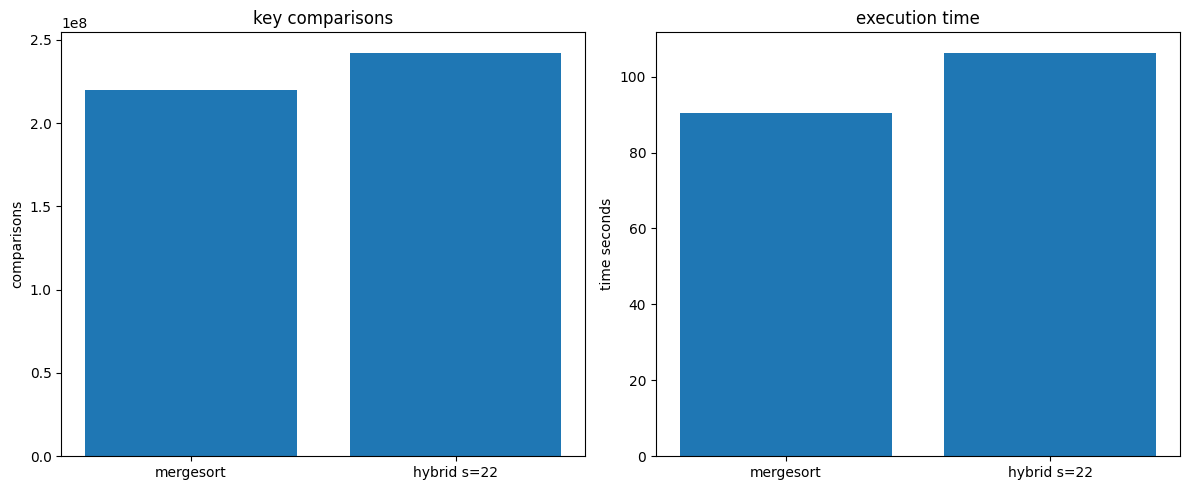

In [44]:
# part d comparison graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# comparisons
algorithms = ['mergesort', f'hybrid s={best_S}']
comparisons = [merge_comps, hybrid_comps]
ax1.bar(algorithms, comparisons)
ax1.set_ylabel('comparisons')
ax1.set_title('key comparisons')

# execution time
times = [merge_time, hybrid_time]
ax2.bar(algorithms, times)
ax2.set_ylabel('time seconds')
ax2.set_title('execution time')

plt.tight_layout()
plt.show()
